# Data Statistics

This file contains an analysis on the DeepDTA datasets, to validate properties of the data as shown in Figure 1 in the paper. We compute the distribution of binding affinity scores and the distribution of the lenghts of protein and SMILES sequences. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import json
import math
import itertools
from collections import OrderedDict

In [2]:
# dataset paths

kiba_dataset_path = 'DeepDTA/data/kiba/'
davis_dataset_path = 'DeepDTA/data/davis/'

In [3]:
# preprocssing

def dataset_stats(dataset_path, log_space=False):
    proteins = json.load(open(dataset_path + "proteins.txt"), object_pairs_hook=OrderedDict)
    ligands = json.load(open(dataset_path + "ligands_can.txt"), object_pairs_hook=OrderedDict)
    Y = pickle.load(open(dataset_path + "Y", "rb"), encoding='latin1')
    if log_space:
        Y = -(np.log10(Y/(math.pow(10,9))))
    Y = Y[~np.isnan(Y)].flatten()
    
    protein_seq_lengths = []
    for t in proteins.keys():
        protein_seq_lengths.append(len(proteins[t]))
     
    ligand_seq_lengths = []
    for d in ligands.keys():
        ligand_seq_lengths.append(len(ligands[d]))
    
    return protein_seq_lengths, ligand_seq_lengths, Y

In [4]:
kiba_protein_seq_lengths, kiba_ligand_seq_lengths, kiba_Y = dataset_stats(kiba_dataset_path)
davis_protein_seq_lengths, davis_ligand_seq_lengths, davis_Y = dataset_stats(davis_dataset_path, log_space=True)

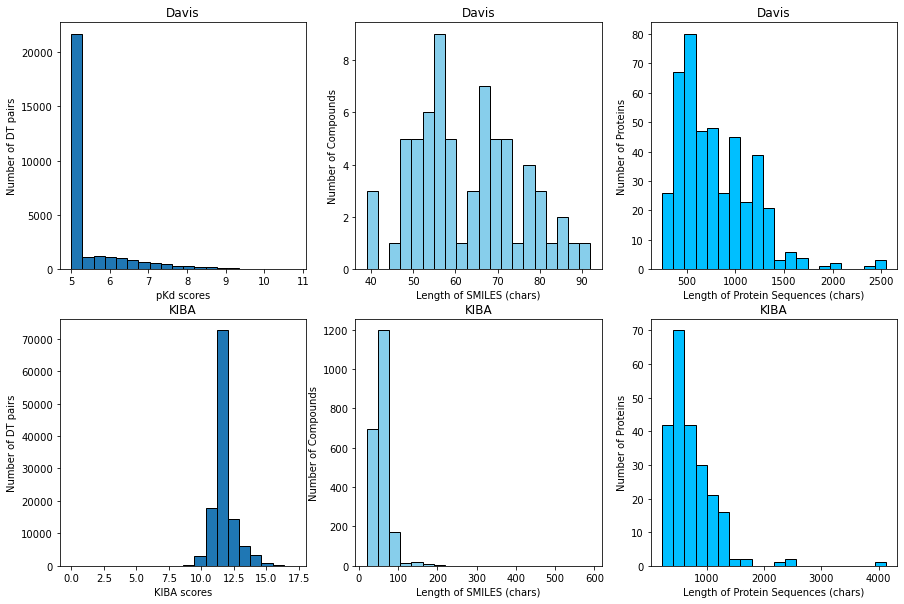

In [5]:
# length & binding affinity distributions

figure, axis = plt.subplots(2, 3, figsize=(15,10))

axis[0, 0].hist(davis_Y, bins=20, ec='black')
axis[0, 1].hist(davis_ligand_seq_lengths, bins=20, ec='black', color = "skyblue")
axis[0, 2].hist(davis_protein_seq_lengths, bins=20, ec='black', color='deepskyblue')

axis[1, 0].hist(kiba_Y, bins=20, ec='black')
axis[1, 1].hist(kiba_ligand_seq_lengths, bins=20, ec='black', color = "skyblue")
axis[1, 2].hist(kiba_protein_seq_lengths, bins=20, ec='black', color='deepskyblue')


axis[1, 0].set_xlabel("KIBA scores")
axis[0, 0].set_xlabel("pKd scores")

for j in range(3):
    axis[1, j].set_title("KIBA")
for j in range(3):
    axis[0, j].set_title("Davis")
for i in range(2):
    axis[i, 0].set_ylabel("Number of DT pairs")
for i in range(2):
    axis[i, 1].set_ylabel("Number of Compounds")
    axis[i, 1].set_xlabel("Length of SMILES (chars)")
for i in range(2):
    axis[i, 2].set_ylabel("Number of Proteins")
    axis[i, 2].set_xlabel("Length of Protein Sequences (chars)") 

plt.savefig("data_stats.pdf", bbox_inches = 'tight')

plt.show()